In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import time

In [3]:
df = pd.read_csv('heart.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1024 non-null   float64
 3   trestbps  1025 non-null   int64  
 4   chol      1022 non-null   float64
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1023 non-null   float64
 8   exang     1025 non-null   int64  
 9   oldpeak   1023 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1024 non-null   float64
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(5), int64(9)
memory usage: 112.2 KB


In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0.0,125,212.0,0,1,168.0,0,1.0,2,2.0,3,0
1,53,1,0.0,140,203.0,1,0,155.0,1,3.1,0,0.0,3,0
2,70,1,0.0,145,174.0,0,1,125.0,1,2.6,0,0.0,3,0
3,61,1,0.0,148,203.0,0,1,161.0,0,0.0,2,1.0,3,0
4,62,0,0.0,138,294.0,1,1,106.0,0,1.9,1,3.0,2,0


In [10]:
df.isnull().sum()

age         0
sex         0
cp          1
trestbps    0
chol        3
fbs         0
restecg     0
thalach     2
exang       0
oldpeak     2
slope       0
ca          1
thal        0
target      0
dtype: int64

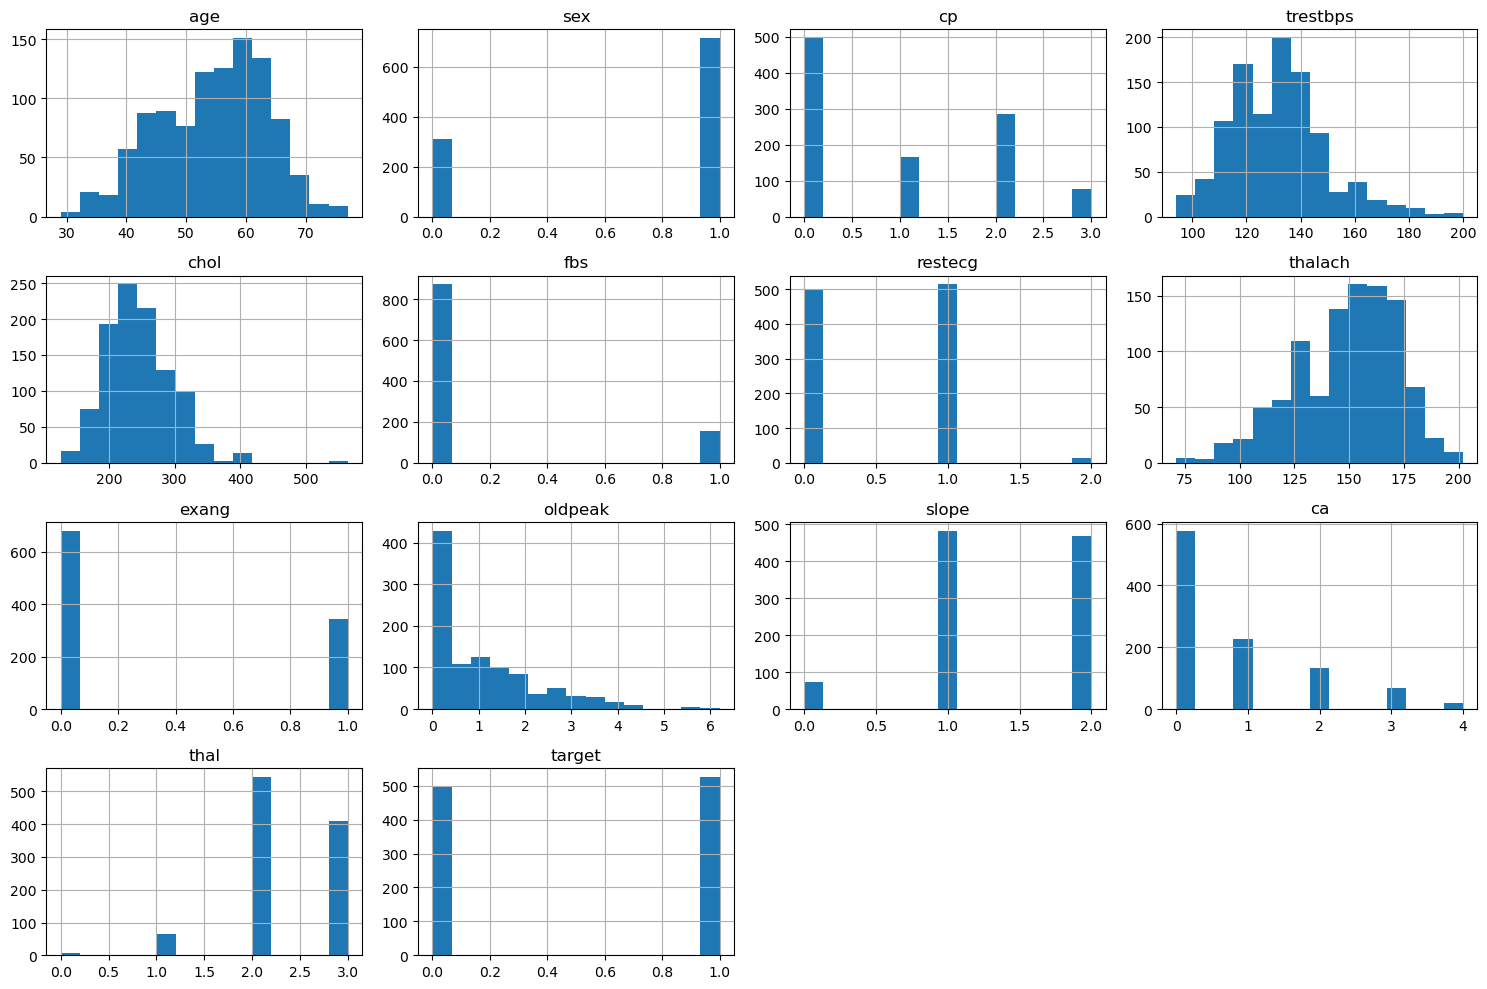

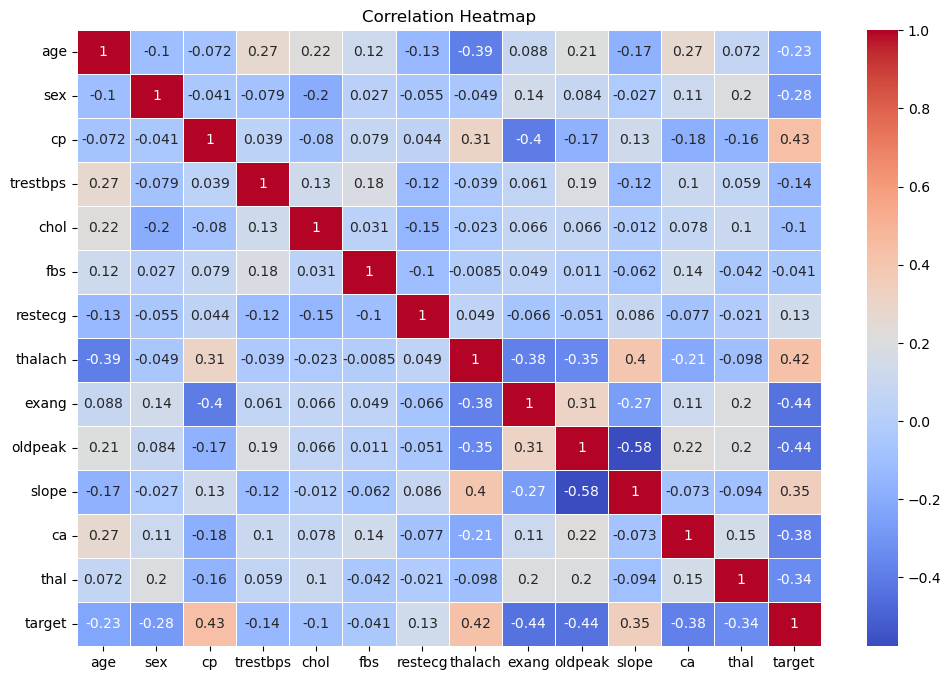

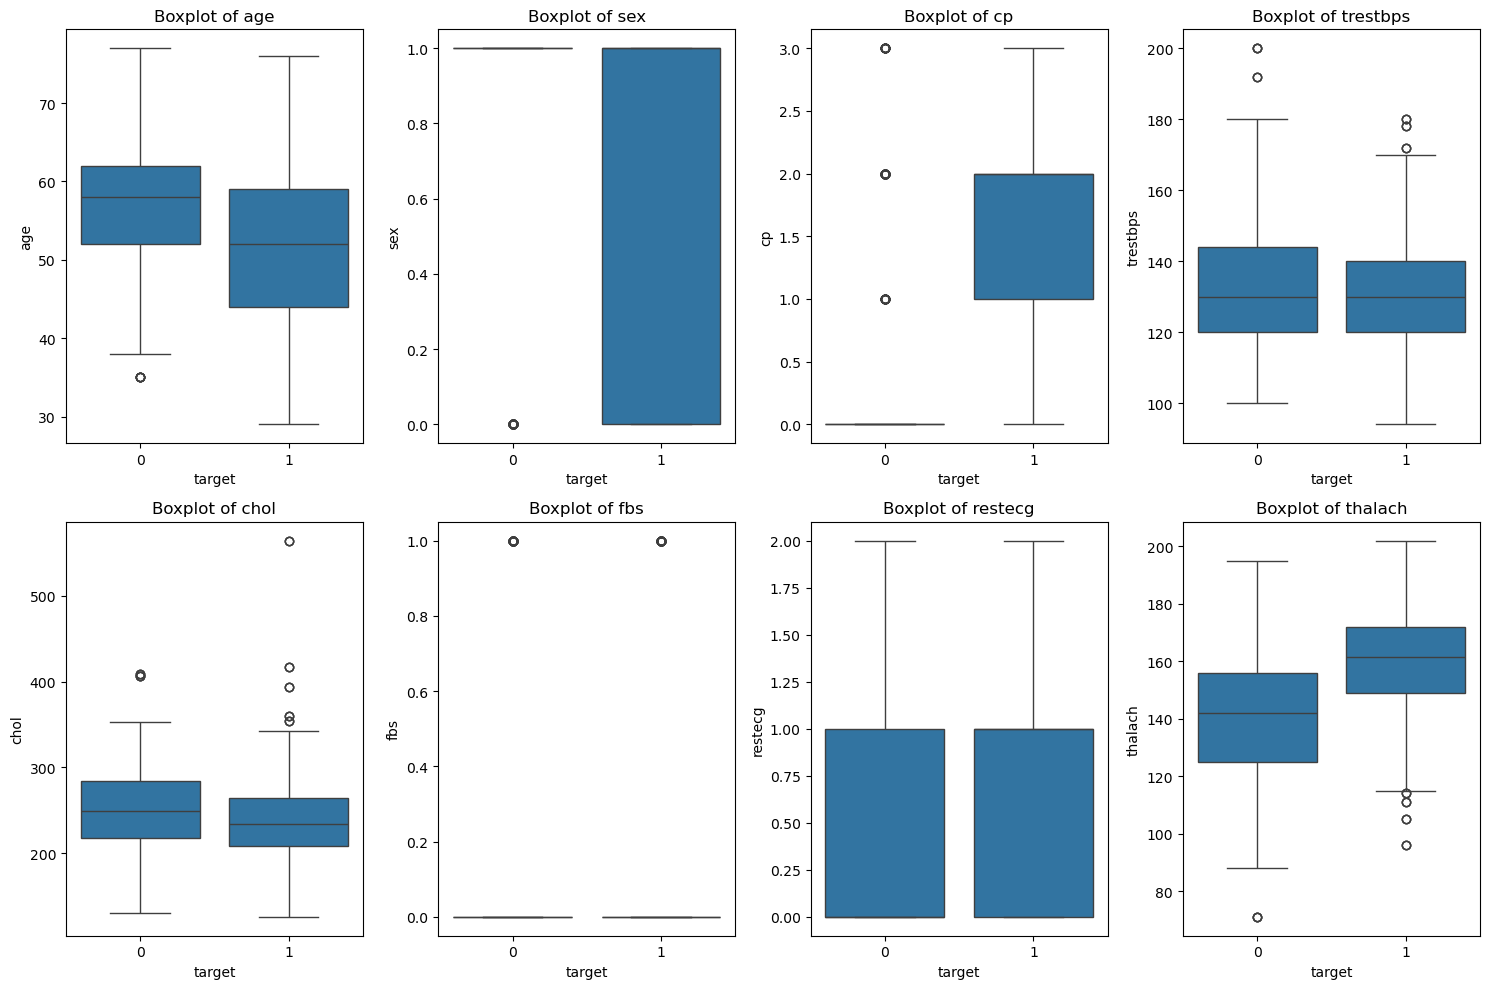

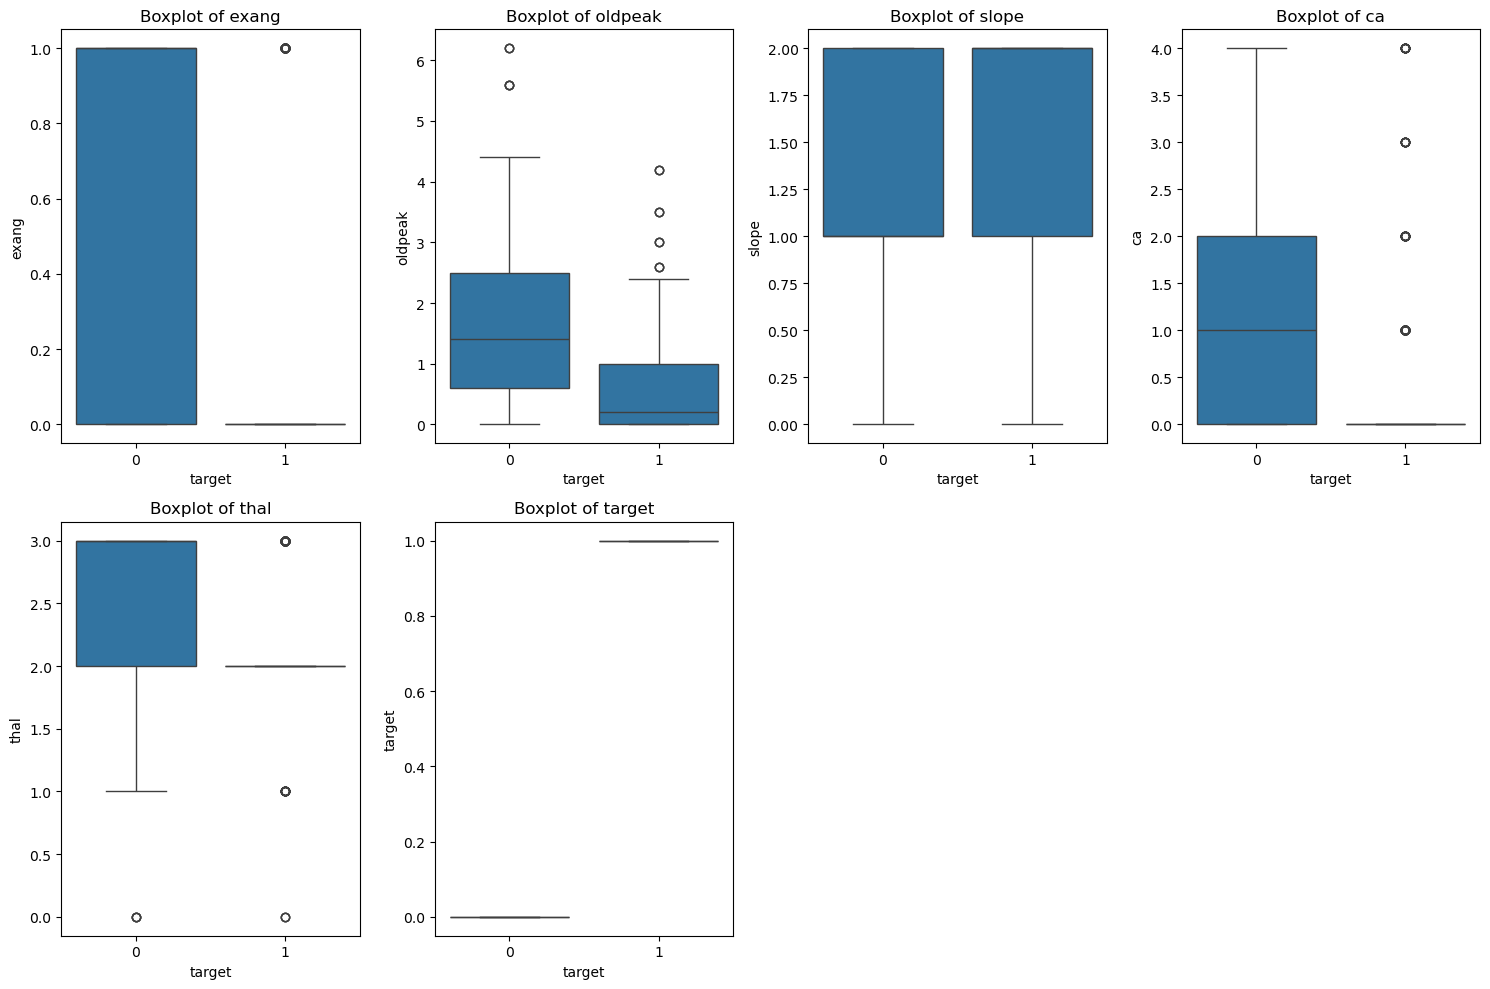

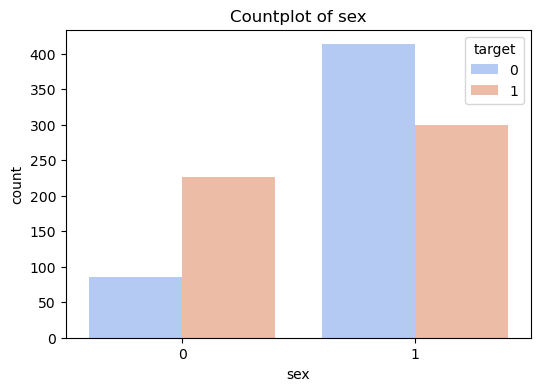

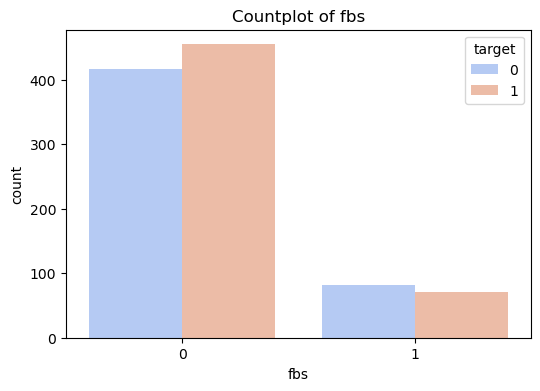

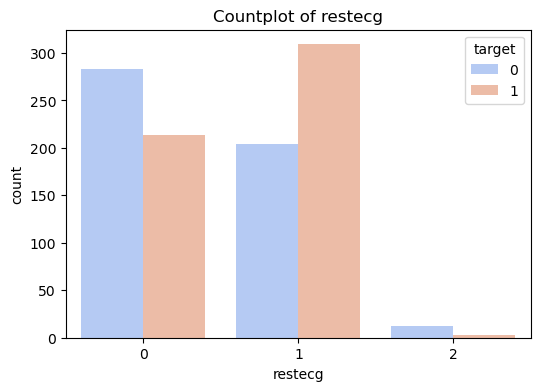

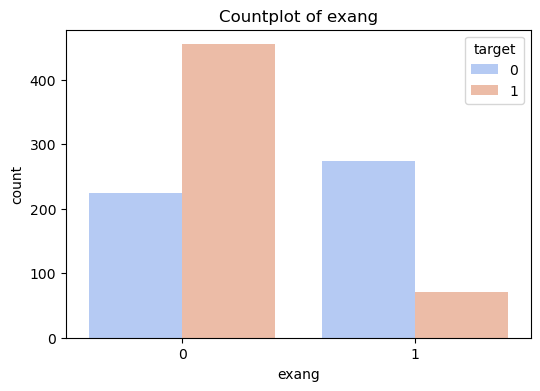

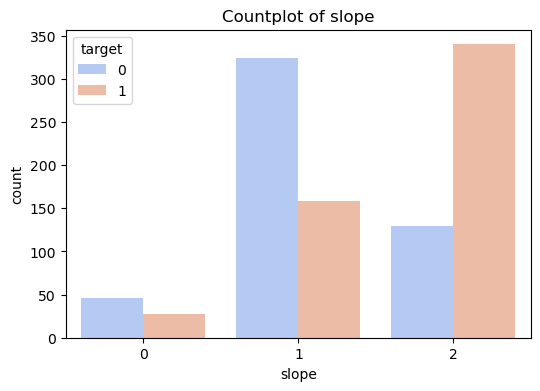

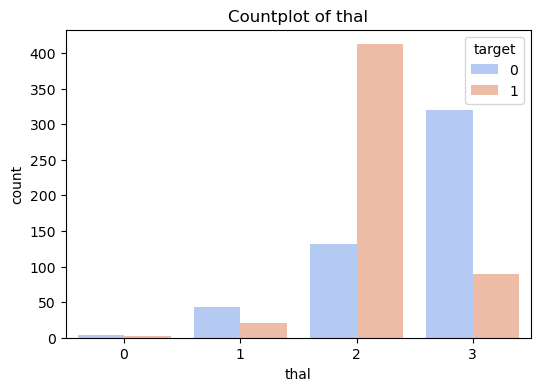

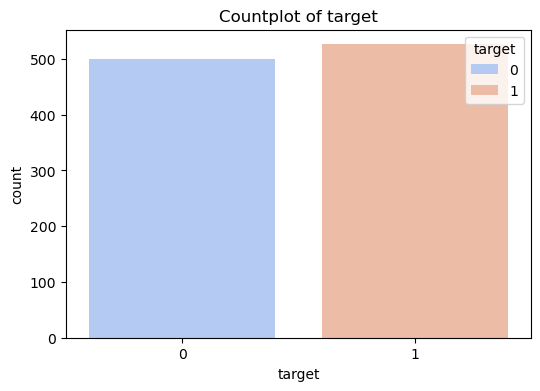

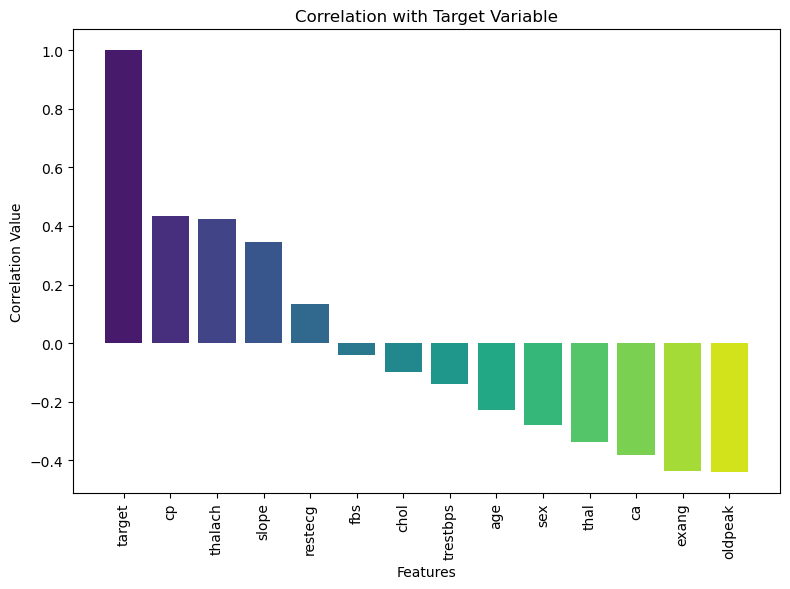

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histograms for Numeric Features
def plot_histograms(df):
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    df[numeric_columns].hist(bins=15, figsize=(15, 10), layout=(4, 4))
    plt.tight_layout()
    plt.show()


# 3. Correlation Heatmap
def plot_correlation_heatmap(df):
    corr = df.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title("Correlation Heatmap")
    plt.show()

# 4. Boxplots to Check for Outliers
def plot_boxplots(df):
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    chunk_size = 8  # Number of plots per figure
    for start in range(0, len(numeric_columns), chunk_size):
        plt.figure(figsize=(15, 10))
        for i, col in enumerate(numeric_columns[start:start + chunk_size]):
            plt.subplot(2, 4, i + 1)
            sns.boxplot(x='target', y=col, data=df)
            plt.title(f"Boxplot of {col}")
        plt.tight_layout()
        plt.show()

# 5. Countplot for Categorical Features
def plot_countplots(df):
    categorical_columns = df.select_dtypes(include=['object', 'int64']).columns
    for col in categorical_columns:
        if df[col].nunique() <= 10:  # Limit to fewer unique categories
            plt.figure(figsize=(6, 4))
            sns.countplot(x=col, hue='target', data=df, palette='coolwarm')
            plt.title(f"Countplot of {col}")
            plt.show()


import numpy as np

# 6. Correlation Between Features with Target
def plot_target_correlation(df):
    correlation_with_target = df.corr()['target'].sort_values(ascending=False)
    plt.figure(figsize=(8, 6))
    
    # Generate a custom color palette
    colors = sns.color_palette('viridis', n_colors=len(correlation_with_target))
    
    # Create a barplot with explicit color assignment
    bars = plt.bar(correlation_with_target.index, correlation_with_target.values, color=colors)
    
    # Add labels and style
    plt.title('Correlation with Target Variable')
    plt.xticks(rotation=90)
    plt.ylabel('Correlation Value')
    plt.xlabel('Features')
    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming `df` is your preprocessed DataFrame

# Run all the visualizations
plot_histograms(df)

plot_correlation_heatmap(df)
plot_boxplots(df)
plot_countplots(df)
plot_target_correlation(df)


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
df.fillna(df.mean(), inplace=True)
print("\nMissing values after imputation:")
print(df.isnull().sum())
X = df.drop(columns=['target'])  # Assuming 'target' is the name of the target column
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(max_iter=2000)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Missing values after imputation:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Accuracy: 79.51%

Confusion Matrix:
[[73 29]
 [13 90]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



In [14]:
from sklearn.ensemble import IsolationForest  # For One-Class Classification
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Support Vector Machine": SVC(probability=True),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Naïve Bayes Classifier": GaussianNB(),
    "One-Class Classification": IsolationForest(contamination=0.1),
    "K Nearest Neighbour Classifier": KNeighborsClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Neural Network Based Classifier": MLPClassifier(max_iter=1000)
}

In [15]:
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

In [34]:
from time import time  # Import the time module
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore")
results = []
# Train and evaluate each model using K-fold cross-validation
for name, model in models.items():
    start_time = time()  # Start the timer using time.time()
    scores = cross_validate(model, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)
    end_time = time()  
    accuracy = np.mean(scores['test_accuracy'])
    precision = np.mean(scores['test_precision'])
    recall = np.mean(scores['test_recall'])
    f1 = np.mean(scores['test_f1'])
    auc = np.mean(scores['test_roc_auc'])
    elapsed_time = end_time - start_time  # Time taken to run the model
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'AUC': auc,
        'Time (s)': elapsed_time
    })

    print(f"{name} completed in {elapsed_time:4f} seconds.")


Logistic Regression completed in 0.332493 seconds.
Support Vector Machine completed in 0.350545 seconds.
Decision Tree Classifier completed in 0.046699 seconds.
Naïve Bayes Classifier completed in 0.032581 seconds.
One-Class Classification completed in 0.511411 seconds.
K Nearest Neighbour Classifier completed in 0.063766 seconds.
Random Forest Classifier completed in 0.548554 seconds.
Neural Network Based Classifier completed in 1.370217 seconds.


In [17]:
results_df = pd.DataFrame(results)

In [18]:
results_df

,Model,Accuracy,Precision,Recall,F1-score,AUC,Time (s)
0,Logistic Regression,0.848780,0.823649,0.903025,0.860662,0.923119,0.421044
1,Support Vector Machine,0.700000,0.689919,0.758880,0.722212,0.764386,0.301209
2,Decision Tree Classifier,0.975610,0.969989,0.983473,0.976508,0.975408,0.043001
3,Naïve Bayes Classifier,0.834146,0.823757,0.862857,0.842811,0.911000,0.048493
4,One-Class Classification,0.480488,NaN,NaN,NaN,0.624612,0.601669
5,K Nearest Neighbour Classifier,0.693902,0.703145,0.704482,0.703560,0.813220,0.088164
6,Random Forest Classifier,0.979268,0.975140,0.985854,0.980094,0.996203,0.642255
7,Neural Network Based Classifier,0.846341,0.814408,0.910252,0.858940,0.915943,1.286105


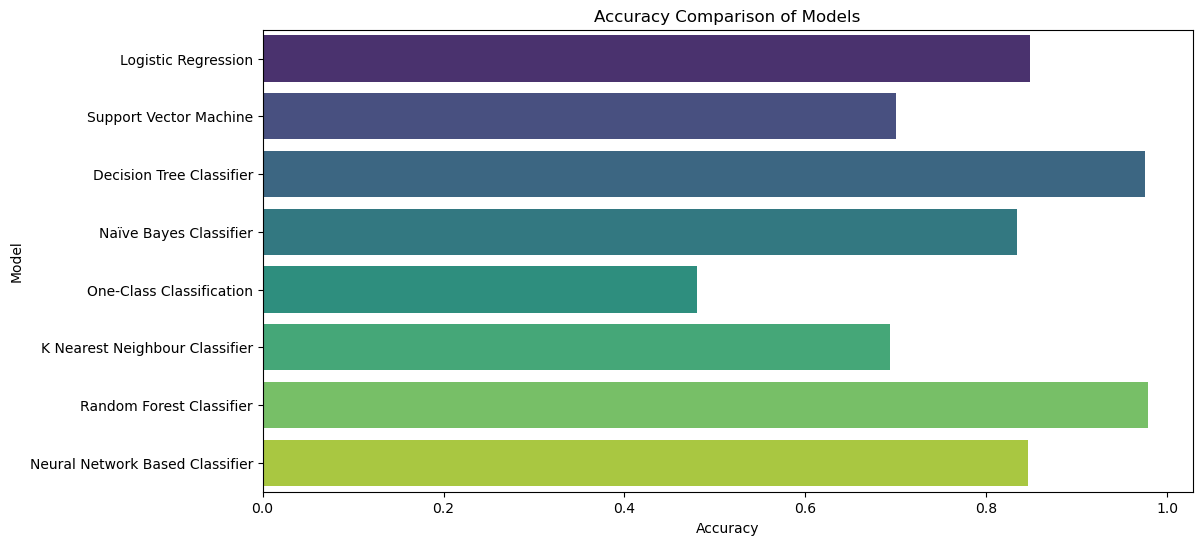

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")
plt.title("Accuracy Comparison of Models")
plt.show()

<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

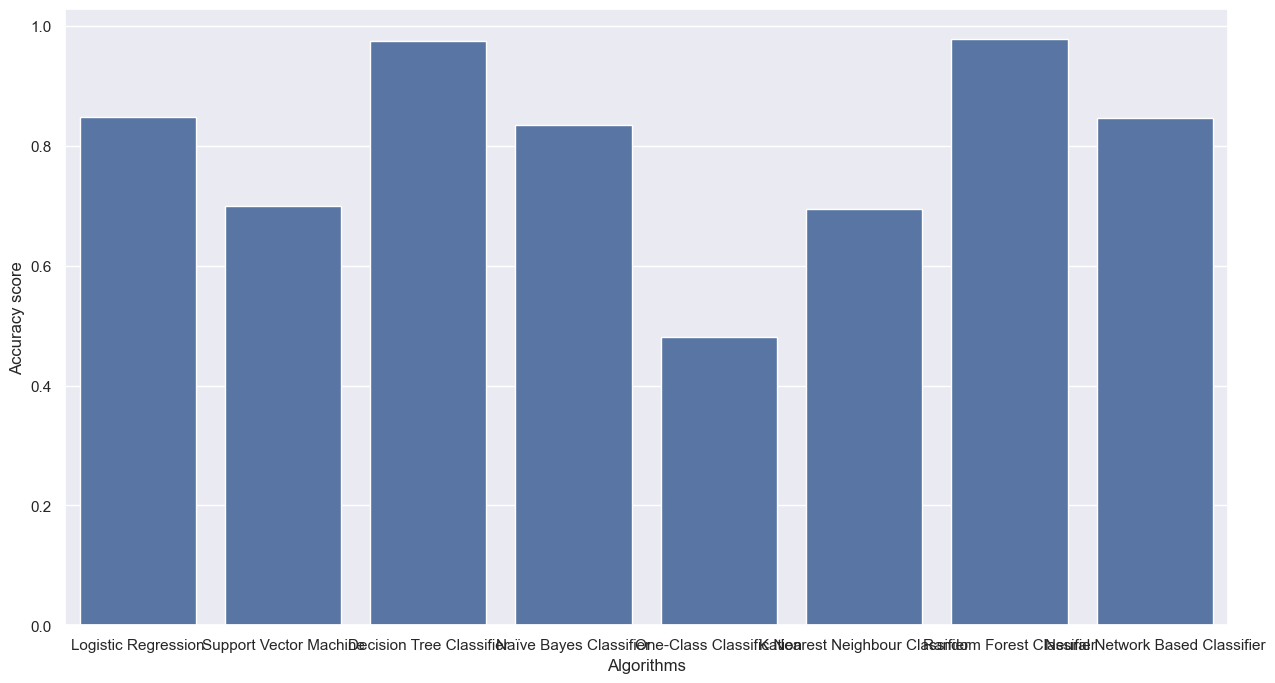

In [20]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=results_df['Model'], y=results_df['Accuracy'])

In [21]:
results_df.to_csv("model_comparison_original.csv", index=False)